In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [35]:
aluminum = pd.read_csv("data/Experiment 4 Aluminum.csv")
aluminum = aluminum[["Latest: Time (s)", "Latest: Temperature (°C)"]]
aluminum.columns = ["time", "temp"]
copper = pd.read_csv("data/Experiment 4 Copper.csv")
copper = copper[["Latest: Time (s)", "Latest: Temperature (°C)"]]
copper.columns = ["time", "temp"]
brass = pd.read_csv("data/Experiment 4 Brass.csv")
brass = brass[["Latest: Time (s)", "Latest: Temperature (°C)"]]
brass.columns = ["time", "temp"]

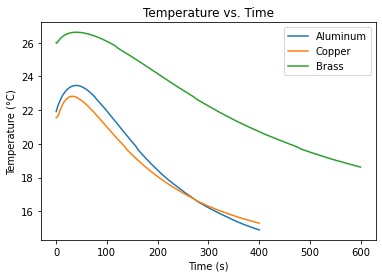

In [36]:
plt.plot(aluminum["time"], aluminum["temp"], label="Aluminum")
plt.plot(copper["time"], copper["temp"], label="Copper")
plt.plot(brass["time"], brass["temp"], label="Brass")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature vs. Time");

In [114]:
def func_to_fit(t, gamma, T0):
    # T0 = 20
    return (4*T0/np.pi)*(np.exp(-gamma*t/2))

In [115]:
popt, pcov = curve_fit(func_to_fit, aluminum["time"], aluminum["temp"], p0=[1, 20])
aluminum_gamma = popt[0]
popt

array([2.62162750e-03, 1.91259717e+01])

Text(0, 0.5, 'Temperature (°C)')

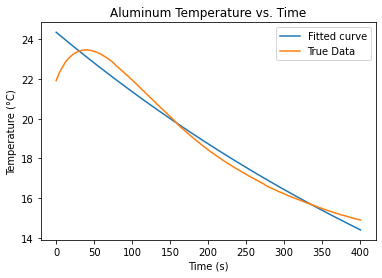

In [116]:
plt.plot(aluminum["time"], func_to_fit(aluminum["time"], *popt), label="Fitted curve")
plt.plot(aluminum["time"], aluminum["temp"], label="True Data")
plt.legend()
plt.title("Aluminum Temperature vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")

In [117]:
popt, pcov = curve_fit(func_to_fit, copper["time"], copper["temp"], p0=[1, 20])
copper_gamma = popt[0]
popt

array([2.30197948e-03, 1.82438332e+01])

Text(0, 0.5, 'Temperature (°C)')

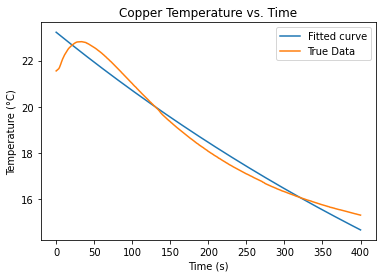

In [118]:
plt.plot(copper["time"], func_to_fit(copper["time"], *popt), label="Fitted curve")
plt.plot(copper["time"], copper["temp"], label="True Data")
plt.legend()
plt.title("Copper Temperature vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")

In [119]:
popt, pcov = curve_fit(func_to_fit, brass["time"], brass["temp"], p0=[1, 20])
brass_gamma = popt[0]
popt

C:\Users\mingf\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([1.35528760e-03, 2.15639283e+01])

Text(0, 0.5, 'Temperature (°C)')

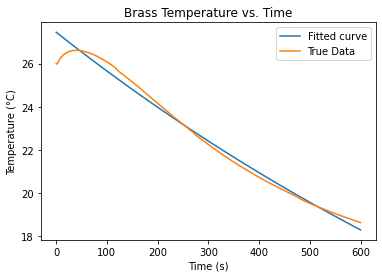

In [120]:
plt.plot(brass["time"], func_to_fit(brass["time"], *popt), label="Fitted curve")
plt.plot(brass["time"], brass["temp"], label="True Data")
plt.legend()
plt.title("Brass Temperature vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")

In [121]:
aluminum_gamma

0.0026216274951505352

In [122]:
copper_gamma

0.002301979479356276

In [123]:
brass_gamma

0.001355287604276771

In [127]:
c_al = 0.89
c_cu = 0.385
c_brass = 0.380

rho_al = 2712
rho_cu = 8940
rho_brass = 8520

In [128]:
copper_gamma/aluminum_gamma * c_cu/c_al * rho_cu/rho_al

1.2521288470806782

In [129]:
brass_gamma/aluminum_gamma * c_brass/c_al * rho_brass/rho_al

0.6934321648687015